# Import necessary libraries

In [427]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Dataset

In [428]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')

In [429]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis(EDA)

In [430]:
# Check for the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [431]:
# Check for the last 5 rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Shape of the data

In [432]:
data.shape

(418, 12)

In [433]:
for col in data.columns:
  print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


Descriptive statistics of the dataset

In [434]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [435]:
# Check for unique values
data.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


In [436]:
# Check for 'Sex' unique value
data['Sex'].unique()

array(['male', 'female'], dtype=object)

Data Cleaning

In [437]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


There are missing values in Age, Fare, and Cabin Columns.

In [438]:
# Drop missing
data = data.dropna(subset=['Age', 'Fare', 'Cabin'])


In [439]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Correcting errors in the Name column

In [440]:
print(data['Name'].head())
data['Name'] =data['Name'].str.strip()

data['Name'] = data['Name'].str.title()

print(data['Name'].head())


12        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
14    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
24      Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
26                         Ostby, Miss. Helene Ragnhild
28                              Brady, Mr. John Bertram
Name: Name, dtype: object
12        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
14    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
24      Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
26                         Ostby, Miss. Helene Ragnhild
28                              Brady, Mr. John Bertram
Name: Name, dtype: object


In [441]:
# Check fo r the occurrences of unique values
data['Survived'].value_counts()

,count
Survived,
1,44
0,43


This means that 44 passengers survived and 43 did not.

In [442]:
# Check for the occurrences of unique values
data['Pclass'].value_counts()

,count
Pclass,
1,78
2,6
3,3


The largest passengers class was in 1st class (78)




<ipython-input-443-521c2ecc4805>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=data['Survived'], hue=data['Pclass'], palette=['green', 'blue'])


<Axes: xlabel='Survived', ylabel='count'>

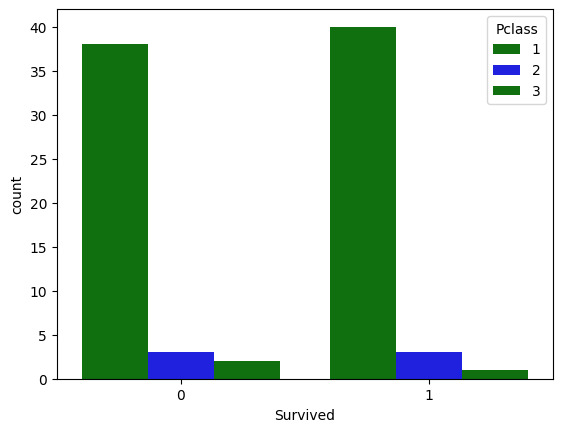

In [443]:
# Relationship between the Survived and the Pclass
sns.countplot(x=data['Survived'], hue=data['Pclass'], palette=['green', 'blue'])


In [444]:
data['Age']

,Age
12,23.0
14,47.0
24,48.0
26,22.0
28,41.0
...,...
404,43.0
405,20.0
407,50.0
411,37.0


In [445]:
data['Sex']

,Sex
12,female
14,female
24,female
26,female
28,male
...,...
404,male
405,male
407,male
411,female


<Axes: xlabel='Survived', ylabel='count'>

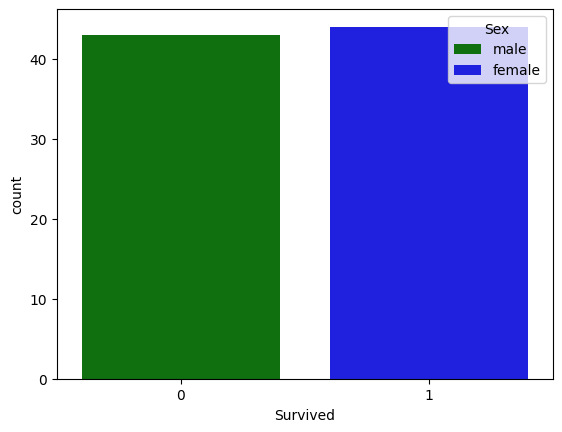

In [446]:
sns.countplot(x=data['Survived'], hue=data['Sex'], palette=['green', 'blue'])


In [447]:
data['Ticket']

,Ticket
12,21228
14,W.E.P. 5734
24,PC 17608
26,113509
28,113054
...,...
404,17765
405,SC/PARIS 2166
407,113503
411,19928


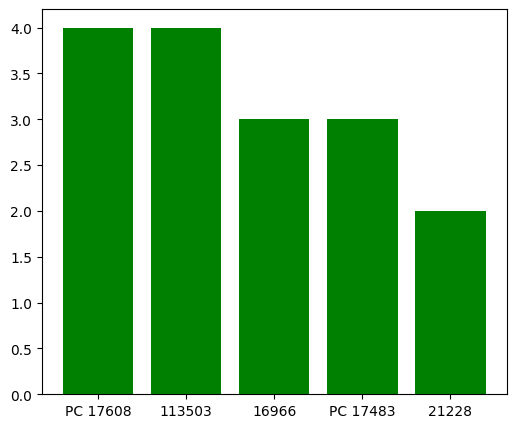

In [448]:
# Top 5 tickets occurence in the ticket column
plt.figure(figsize=(6,5))
plt.bar(list(data['Ticket'].value_counts()[0:5].keys()),list(data['Ticket'].value_counts()[0:5]),color='g')
plt.show()

In [449]:
data['Cabin']

,Cabin
12,B45
14,E31
24,B57 B59 B63 B66
26,B36
28,A21
...,...
404,D40
405,D38
407,C80
411,C78


In [450]:
data['Fare']

,Fare
12,82.2667
14,61.1750
24,262.3750
26,61.9792
28,30.5000
...,...
404,27.7208
405,13.8625
407,211.5000
411,90.0000


In [451]:
data['Name']

,Name
12,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)"
14,"Chaffee, Mrs. Herbert Fuller (Carrie Constance..."
24,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)"
26,"Ostby, Miss. Helene Ragnhild"
28,"Brady, Mr. John Bertram"
...,...
404,"Frauenthal, Mr. Isaac Gerald"
405,"Nourney, Mr. Alfred (Baron Von Drachstedt"")"""
407,"Widener, Mr. George Dunton"
411,"Minahan, Mrs. William Edward (Lillian E Thorpe)"


In [452]:
#survival rate by Age
data.groupby('Age')[['Survived']].mean()

,Survived
Age,
1.0,1.000000
6.0,0.000000
12.0,1.000000
13.0,0.000000
18.0,1.000000
18.5,0.000000
20.0,0.000000
22.0,1.000000
23.0,0.666667


In [453]:
#survival rate by Sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


Relationship between Fare and Passenger class

In [454]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Sex']= labelencoder.fit_transform(data['Sex'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,S


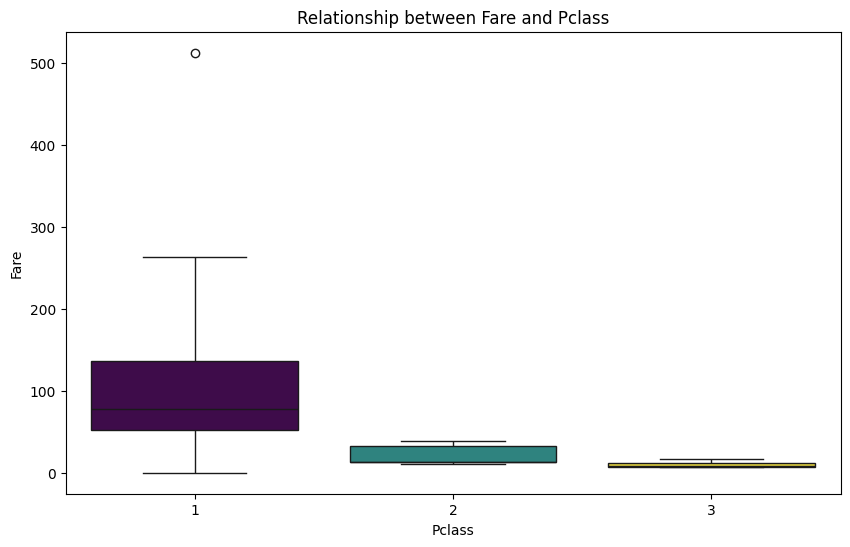

In [455]:
# Plotting the relationship between fare and Pclass
plt.figure(figsize=(10, 6))
# Added the data argument
sns.boxplot(x='Pclass', y='Fare', data=data, hue='Pclass', palette='viridis', legend=False)
plt.title('Relationship between Fare and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

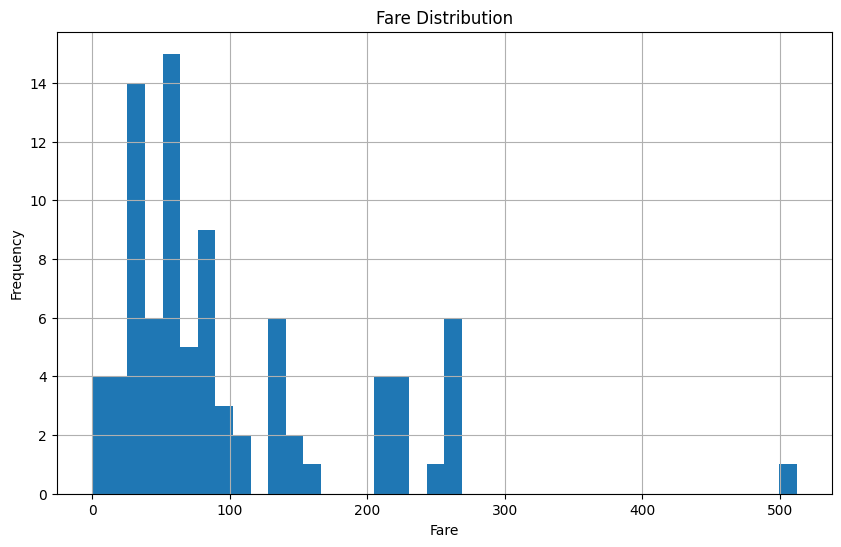

In [456]:
data=data['Fare'].hist(bins=40, figsize=(10,6))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

<Axes: >

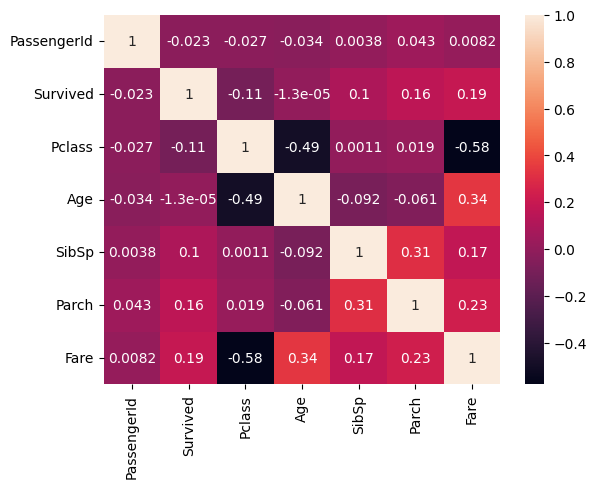

In [457]:
# Correlation Matrix
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')
correlation = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation, annot=True)

In [458]:
data = data.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin', 'Fare', 'Embarked'])
print(data.head())

   Survived  Pclass     Sex  SibSp  Parch
0         0       3    male      0      0
1         1       3  female      1      0
2         0       2    male      0      0
3         0       3    male      0      0
4         1       3  female      1      1


<Axes: >

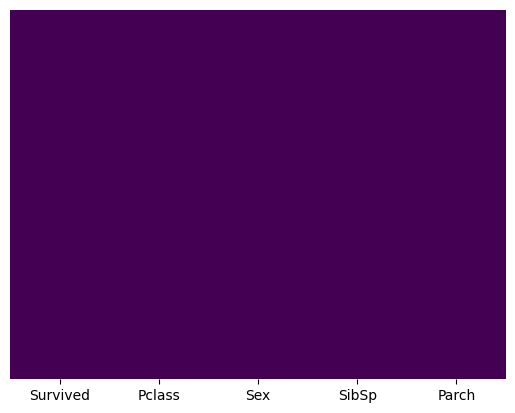

In [459]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are no missing values left in the dataset

In [460]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,0,0
1,1,3,female,1,0
2,0,2,male,0,0
3,0,3,male,0,0
4,1,3,female,1,1


In [477]:
# Convert 'Sex' column to numerical values using one-hot encoding
x = pd.get_dummies(x, columns=['Sex'], drop_first=True)

In [461]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')

In [476]:
#Model prediction
x = data[['Pclass', 'Sex']]
# Target variable = y
y = data['Survived']

# Train_Test_Split

In [463]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [478]:
#Using logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=42)
log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [479]:
pred = print(log.predict(x_test))

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]


In [480]:
#the target variable values
print(y_test)

27     0
389    0
89     0
280    1
68     0
      ..
397    1
3      0
95     0
308    0
71     0
Name: Survived, Length: 67, dtype: int64


In [468]:
y_test[388]

0

In [481]:
# Make predictions
pred = log.predict(x_test)
#Access the 3rd element of the pred array
pred[2]

0

In [ ]:
pred = log.predict(x_test)
print(pred)

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]


Using Random Forest Classifier Model

In [471]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked']
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

In [472]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Define features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

#Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.00
Confusion Matrix:
 [[45  0]
 [ 0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [493]:
import xgboost as xgb
print(xgb.__version__)  # This should print the version of xgboost if installed successfully

2.1.1


In [496]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')  # Update with your dataset path

# Prepare your data
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})  # Encode 'Sex'
features = data[['Pclass', 'Sex']]
target = data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Optionally, check accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Save the new model
import joblib
joblib.dump(model, 'new_pretrained_model.pkl')


Model Accuracy: 1.0


['new_pretrained_model.pkl']